# Classification

For the Classification portion of this project we'll be using the Employee Attrition dataset created by IBM that is uploaded on Kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

## <font color=blue> Importing Basic Libraries and Reading Dataset </font>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IBM_HR_EmployeeAttrition.csv")

## <font color=blue> Data Exploration & Preparation </font>

#### Null ~5% to 10% of dataset and drop NaN values

Setting RNG seed and creating NaN values randomly within data set the .002 was generated using trial and error by calculating proportion of NaN values to rest of dataset (shown in next cell).

In [3]:
np.random.seed(200)
df = df.mask(np.random.random(df.shape) < .002)

In [4]:
print('Count of NaN data:', df.isna().sum().sum())
print('NaN data relative to number of rows:', (df.isna().sum().sum() / df.shape[0]))

Count of NaN data: 94
NaN data relative to number of rows: 0.06394557823129252


In [5]:
# Removing NaN values
df.dropna(how='any', inplace=True)

#### Dataset Exploration

In [6]:
# Check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1379 non-null   int64  
 1   Attrition                 1379 non-null   object 
 2   BusinessTravel            1379 non-null   object 
 3   DailyRate                 1379 non-null   float64
 4   Department                1379 non-null   object 
 5   DistanceFromHome          1379 non-null   float64
 6   Education                 1379 non-null   float64
 7   EducationField            1379 non-null   object 
 8   EmployeeCount             1379 non-null   float64
 9   EmployeeNumber            1379 non-null   float64
 10  EnvironmentSatisfaction   1379 non-null   float64
 11  Gender                    1379 non-null   object 
 12  HourlyRate                1379 non-null   float64
 13  JobInvolvement            1379 non-null   float64
 14  JobLevel

In [7]:
df['Attrition'].unique() # Target Column - Map

array(['Yes', 'No'], dtype=object)

In [8]:
df['BusinessTravel'].unique() # One-hot encode

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
df['Department'].unique() # One-hot encode

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
df['EducationField'].unique() # One-hot encode

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [11]:
df['Gender'].unique() # Map

array(['Female', 'Male'], dtype=object)

In [12]:
df['JobRole'].unique() # One-hot encode

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
df['MaritalStatus'].unique() # Map

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
df['Over18'].unique() # Only contains one value - remove

array(['Y'], dtype=object)

In [15]:
df['OverTime'].unique() # Map

array(['Yes', 'No'], dtype=object)

In [16]:
df['EmployeeNumber'] # Can remove - irrelevant for data

0          1.0
1          2.0
2          4.0
4          7.0
5          8.0
         ...  
1465    2061.0
1466    2062.0
1467    2064.0
1468    2065.0
1469    2068.0
Name: EmployeeNumber, Length: 1379, dtype: float64

#### Target Column Analysis

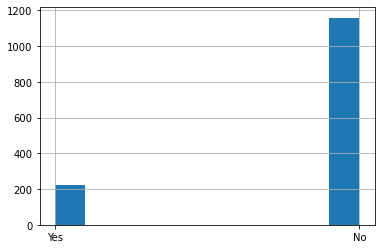

In [17]:
df['Attrition'].hist()

In [18]:
df['Attrition'].value_counts()

No     1158
Yes     221
Name: Attrition, dtype: int64

In [19]:
# Check proportion of 'Yes' values
221 / (1158 + 221)

0.1602610587382161

A large issue is that this data is heavily skewed toward the 'No' value. Only around 16% of the data is 'Yes'. We'll keep this in mind when analyzing the models later on. 

#### Mapping Values

In [20]:
# Attrition - this is our target column - No = 0, Yes = 1
df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1}).astype(int)

# Overtime - No = 0, Yes = 1
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1}).astype(int)

# Gender - Male = 0, Female = 1
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)

# Marital Status - Single = 0, Married = 1, Divorced = 2
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1, 'Divorced':2}).astype(int)

#### One-hot Encoding

In [21]:
# Business Travel
cols = pd.get_dummies(df['BusinessTravel'], prefix= 'BusTravel')
df[cols.columns] = cols
df.drop('BusinessTravel', axis = 1, inplace = True)

# Department
cols = pd.get_dummies(df['Department'], prefix= 'Dept')
df[cols.columns] = cols
df.drop('Department', axis = 1, inplace = True)

# Education Field
cols = pd.get_dummies(df['EducationField'], prefix= 'EduField')
df[cols.columns] = cols
df.drop('EducationField', axis = 1, inplace = True)

# Job Role
cols = pd.get_dummies(df['JobRole'], prefix= 'JobRole')
df[cols.columns] = cols
df.drop('JobRole', axis = 1, inplace = True)

#### Dropping Columns with No Meaning

Dropping the 'Over18' column as it only contains one value, and will be meaningless in analysis. The 'EmployeeNumber' field will also be dropped as it has no meaning to the models.

In [22]:
df = df.drop(['Over18', 'EmployeeNumber'], axis = 1)

#### Verifying no 'Object' Dtypes are in the dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1379 non-null   int64  
 1   Attrition                          1379 non-null   int32  
 2   DailyRate                          1379 non-null   float64
 3   DistanceFromHome                   1379 non-null   float64
 4   Education                          1379 non-null   float64
 5   EmployeeCount                      1379 non-null   float64
 6   EnvironmentSatisfaction            1379 non-null   float64
 7   Gender                             1379 non-null   int32  
 8   HourlyRate                         1379 non-null   float64
 9   JobInvolvement                     1379 non-null   float64
 10  JobLevel                           1379 non-null   int64  
 11  JobSatisfaction                    1379 non-null   float

#### Resetting Index

In [24]:
df = df.reset_index(drop = True)
df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EduField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102.0,1.0,2.0,1.0,2.0,1,94.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279.0,8.0,1.0,1.0,3.0,0,61.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373.0,2.0,2.0,1.0,4.0,0,92.0,2.0,...,0,0,0,1,0,0,0,0,0,0
3,27,0,591.0,2.0,1.0,1.0,1.0,0,40.0,3.0,...,0,0,0,1,0,0,0,0,0,0
4,32,0,1005.0,2.0,2.0,1.0,4.0,0,79.0,3.0,...,0,0,0,1,0,0,0,0,0,0
5,59,0,1324.0,3.0,3.0,1.0,3.0,1,81.0,4.0,...,0,0,0,1,0,0,0,0,0,0
6,30,0,1358.0,24.0,1.0,1.0,4.0,0,67.0,3.0,...,0,0,0,1,0,0,0,0,0,0
7,38,0,216.0,23.0,3.0,1.0,4.0,0,44.0,2.0,...,0,0,0,0,0,1,0,0,0,0
8,36,0,1299.0,27.0,3.0,1.0,3.0,0,94.0,3.0,...,0,1,0,0,0,0,0,0,0,0
9,35,0,809.0,16.0,3.0,1.0,1.0,0,84.0,4.0,...,0,0,0,1,0,0,0,0,0,0


#### Preparing Variables for Classification

In [25]:
# y = target column 'Attrition', X = dataset without 'Attrition'
X = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

**train_test_split and scale data for Classification**

Will be normalizing the data due to the varied measurements the dataset contains. Using the MinMaxScaler will rescale the data between 0 and 1.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

print('Size of training set:', X_train.shape[0], '\nSize of testing set:', X_test.shape[0])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Size of training set: 965 
Size of testing set: 414


#### Import Classifier Models and Metrics

In [27]:
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# For Analysis of Models
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve, 
                             accuracy_score, precision_recall_fscore_support as score)

## <font color=blue> GridSearch Model Estimators </font>

This is to determine the best esimators for all the models used in Project 1. We will be using the best estimators in the PCA, Voting, Bagging & Pasting and AdaBoost models. We will also be referencing the results achieved in Project 1 (which used these estimators) when analyzing the overall results.

**GridSearch for best kNN estimators**

In [28]:
t = list(range(1,21))

gridKNN = GridSearchCV(KNeighborsClassifier(), 
                      param_grid = {'n_neighbors': t}, return_train_score = True)
gridKNN.fit(X_train, y_train)
print(gridKNN.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


**GridSearch for best Logistic Regression estimators**

In [29]:
gridLR = GridSearchCV(LogisticRegression(max_iter = 10000, random_state = 0, solver='liblinear'), 
                       param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
                                    'penalty':['l1', 'l2']}, return_train_score = True)
gridLR.fit(X_train, y_train)
print(gridLR.best_estimator_)

LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')


**GridSearch for best Linear SVC estimators**

In [30]:
gridLSVC = GridSearchCV(LinearSVC(max_iter = 15000, dual = False, random_state = 0),
                    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']}, 
                    return_train_score = True)
gridLSVC.fit(X_train, y_train)
print(gridLSVC.best_estimator_)

LinearSVC(C=0.1, dual=False, max_iter=15000, random_state=0)


**GridSearch for best SVC Linear kernel estimators**

In [31]:
gridLinearSVC = GridSearchCV(SVC(kernel = 'linear', random_state = 0, probability = True),
                            param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}, return_train_score = True)
gridLinearSVC.fit(X_train, y_train)
print(gridLinearSVC.best_estimator_)

SVC(C=1, kernel='linear', probability=True, random_state=0)


**GridSearch for best SVC RBF kernel estimators**

In [32]:
gridRBFSVC = GridSearchCV(SVC(kernel = 'rbf'),
                          param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma':[0.0001, 0.001, 0.01, 0.1]}, 
                          return_train_score = True)
gridRBFSVC.fit(X_train, y_train)
print(gridRBFSVC.best_estimator_)

SVC(C=100, gamma=0.01)


**GridSearch for best SVC Poly kernel estimators**

In [33]:
gridPolySVC = GridSearchCV(SVC(kernel = 'poly'),
                            param_grid = {'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                          'gamma':[0.0001, 0.001, 0.01, 0.1], 'coef0':[0,1]}, 
                            return_train_score = True)
gridPolySVC.fit(X_train, y_train)
print(gridPolySVC.best_estimator_)

SVC(coef0=1, gamma=0.1, kernel='poly')


**GridSearch for best Decision Tree estimators**

In [34]:
gridDtree = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                         param_grid = {'max_depth':[1,2,3,4,5,6,7], 'criterion':['gini', 'entropy'], 
                                       'splitter':['best','random']}, 
                         return_train_score = True)
gridDtree.fit(X_train, y_train)
print(gridDtree.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


## <font color=blue> Voting Classifier (Hard Voting) </font>

We will be using kNN Classifier, Logistic Regression and SVC with Linear kernel as estimators for the hard voting classifier. 

In [35]:
from sklearn.ensemble import VotingClassifier

**Fit models**

In [36]:
kNNClf = KNeighborsClassifier(n_neighbors=7)
kNNClf.fit(X_train, y_train)
logClf = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
logClf.fit(X_train, y_train)
svcLinear = SVC(C=1, kernel='linear', probability=True, random_state=0)
svcLinear.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=0)

**Fit hard voting classifier model**

In [37]:
votingHClf = VotingClassifier(estimators=[('kNN', kNNClf), ('Log', logClf), ('SVC', svcLinear)], voting='hard')
votingHClf.fit(X_train, y_train)

VotingClassifier(estimators=[('kNN', KNeighborsClassifier(n_neighbors=7)),
                             ('Log',
                              LogisticRegression(C=1, max_iter=10000,
                                                 random_state=0,
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=0))])

**Train scores for models** 

In [38]:
for clf in (kNNClf, logClf, svcLinear, votingHClf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

KNeighborsClassifier 0.8694300518134715
LogisticRegression 0.8891191709844559
SVC 0.8932642487046633
VotingClassifier 0.8911917098445595


**Test scores for models**

In [39]:
for clf in (kNNClf, logClf, svcLinear, votingHClf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

KNeighborsClassifier 0.8454106280193237
LogisticRegression 0.8768115942028986
SVC 0.8695652173913043
VotingClassifier 0.8743961352657005


**Predict the results (train data)**

In [40]:
y_pred = votingHClf.predict(X_train)

**Classification Report (train data)** 

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       808
           1       0.85      0.40      0.55       157

    accuracy                           0.89       965
   macro avg       0.87      0.69      0.74       965
weighted avg       0.89      0.89      0.87       965



In [42]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [43]:
y_pred = votingHClf.predict(X_test)

**Classification Report (test data)** 

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.75      0.28      0.41        64

    accuracy                           0.87       414
   macro avg       0.82      0.63      0.67       414
weighted avg       0.86      0.87      0.85       414



In [45]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [46]:
confm = confusion_matrix(y_test, y_pred)

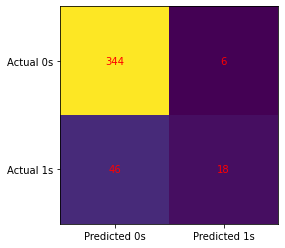

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [48]:
VotingHInfo = ['VotingHard', votingHClf.score(X_train, y_train), votingHClf.score(X_test, y_test), 
                  abs(votingHClf.score(X_train, y_train) - votingHClf.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

## <font color=blue> Voting Classifier (Soft Voting) </font>

We will be using kNN Classifier, Logistic Regression and SVC with RBF kernel for the soft voting classifier (using the models fitted in the Hard Voting Classifier). 

In [49]:
votingSClf = VotingClassifier(estimators=[('kNN', kNNClf), ('Log', logClf), ('SVC', svcLinear)], voting='soft')
votingSClf.fit(X_train, y_train)

VotingClassifier(estimators=[('kNN', KNeighborsClassifier(n_neighbors=7)),
                             ('Log',
                              LogisticRegression(C=1, max_iter=10000,
                                                 random_state=0,
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=0))],
                 voting='soft')

**Train scores for models** 

In [50]:
for clf in (kNNClf, logClf, svcLinear, votingSClf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

KNeighborsClassifier 0.8694300518134715
LogisticRegression 0.8891191709844559
SVC 0.8932642487046633
VotingClassifier 0.8880829015544042


**Test scores for models**

In [51]:
for clf in (kNNClf, logClf, svcLinear, votingSClf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

KNeighborsClassifier 0.8454106280193237
LogisticRegression 0.8768115942028986
SVC 0.8695652173913043
VotingClassifier 0.857487922705314


**Predict the results (train data)**

In [52]:
y_pred = votingSClf.predict(X_train)

**Classification Report (train data)** 

In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       808
           1       0.93      0.34      0.50       157

    accuracy                           0.89       965
   macro avg       0.91      0.67      0.72       965
weighted avg       0.89      0.89      0.87       965



In [54]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [55]:
y_pred = votingSClf.predict(X_test)

**Classification Report (test data)** 

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       350
           1       0.69      0.14      0.23        64

    accuracy                           0.86       414
   macro avg       0.78      0.56      0.58       414
weighted avg       0.84      0.86      0.82       414



In [57]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [58]:
confm = confusion_matrix(y_test, y_pred)

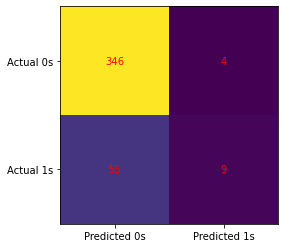

In [59]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [60]:
VotingSInfo = ['VotingSoft', votingSClf.score(X_train, y_train), votingSClf.score(X_test, y_test), 
                  abs(votingSClf.score(X_train, y_train) - votingSClf.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

## <font color=blue> Bagging and Pasting </font>

We'll be using Decision Tree and Logistic Regression for both the Bagging and Pasting models. This is done to see a clear difference between how both the Bagging and Pasting models differ in their results.

In [61]:
from sklearn.ensemble import BaggingClassifier

### <font color=green> Bagging (Decision Tree) </font>

In [62]:
dtClf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
bagDT = BaggingClassifier(dtClf, n_estimators=500, max_samples=100, bootstrap=True, 
                          random_state=0, oob_score = True)
bagDT.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=0),
                  max_samples=100, n_estimators=500, oob_score=True,
                  random_state=0)

**Train scores for model** 

In [63]:
print(bagDT.score(X_train, y_train))

0.861139896373057


**Test scores for model**

In [64]:
print(bagDT.score(X_test, y_test))

0.8502415458937198


**Out-of-bag score**

In [65]:
print(bagDT.oob_score_)

0.8487046632124352


**Predict the results (train data)**

In [66]:
y_pred = bagDT.predict(X_train)

**Classification Report (train data)** 

In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       808
           1       0.93      0.16      0.27       157

    accuracy                           0.86       965
   macro avg       0.89      0.58      0.60       965
weighted avg       0.87      0.86      0.82       965



In [68]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [69]:
y_pred = bagDT.predict(X_test)

**Classification Report (test data)** 

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       350
           1       0.62      0.08      0.14        64

    accuracy                           0.85       414
   macro avg       0.74      0.53      0.53       414
weighted avg       0.82      0.85      0.80       414



In [71]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [72]:
confm = confusion_matrix(y_test, y_pred)

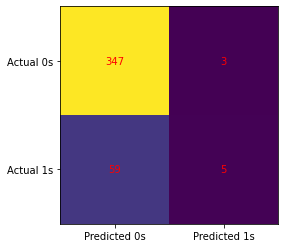

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [74]:
BaggingDTInfo = ['Bagging DT', bagDT.score(X_train, y_train), bagDT.score(X_test, y_test), 
                  abs(bagDT.score(X_train, y_train) - bagDT.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Bagging (Logistic Regression) </font>

In [75]:
lrClf = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
bagLR = BaggingClassifier(lrClf, n_estimators=500, max_samples=100, bootstrap=True, 
                          random_state=0, oob_score = True)
bagLR.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, max_iter=10000,
                                                    random_state=0,
                                                    solver='liblinear'),
                  max_samples=100, n_estimators=500, oob_score=True,
                  random_state=0)

**Train scores for model** 

In [76]:
print(bagLR.score(X_train, y_train))

0.8435233160621761


**Test scores for model**

In [77]:
print(bagLR.score(X_test, y_test))

0.8526570048309179


**Out-of-bag score**

In [78]:
print(bagLR.oob_score_)

0.8424870466321244


**Predict the results (train data)**

In [79]:
y_pred = bagLR.predict(X_train)

**Classification Report (train data)** 

In [80]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       808
           1       0.88      0.04      0.08       157

    accuracy                           0.84       965
   macro avg       0.86      0.52      0.50       965
weighted avg       0.85      0.84      0.78       965



In [81]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [82]:
y_pred = bagLR.predict(X_test)

**Classification Report (test data)** 

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       350
           1       1.00      0.05      0.09        64

    accuracy                           0.85       414
   macro avg       0.93      0.52      0.50       414
weighted avg       0.87      0.85      0.79       414



In [84]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [85]:
confm = confusion_matrix(y_test, y_pred)

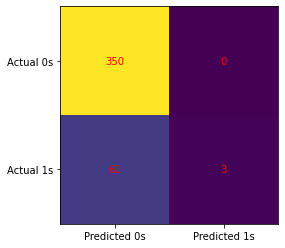

In [86]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [87]:
BaggingLRInfo = ['Bagging LR', bagLR.score(X_train, y_train), bagLR.score(X_test, y_test), 
                  abs(bagLR.score(X_train, y_train) - bagLR.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Pasting (Decision Tree) </font>

In [88]:
dtClf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
pasteDT = BaggingClassifier(dtClf, n_estimators=500, max_samples=100, bootstrap=False, 
                          random_state=0)
pasteDT.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=0),
                  bootstrap=False, max_samples=100, n_estimators=500,
                  random_state=0)

**Train scores for model** 

In [89]:
print(pasteDT.score(X_train, y_train))

0.861139896373057


**Test scores for model**

In [90]:
print(pasteDT.score(X_test, y_test))

0.8478260869565217


**Predict the results (train data)**

In [91]:
y_pred = pasteDT.predict(X_train)

**Classification Report (train data)** 

In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       808
           1       0.96      0.15      0.26       157

    accuracy                           0.86       965
   macro avg       0.91      0.58      0.59       965
weighted avg       0.88      0.86      0.82       965



In [93]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [94]:
y_pred = pasteDT.predict(X_test)

**Classification Report (test data)** 

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       350
           1       0.57      0.06      0.11        64

    accuracy                           0.85       414
   macro avg       0.71      0.53      0.51       414
weighted avg       0.81      0.85      0.79       414



In [96]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [97]:
confm = confusion_matrix(y_test, y_pred)

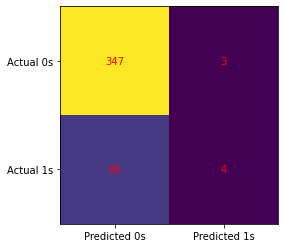

In [98]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [99]:
PastingDTInfo = ['Pasting DT', pasteDT.score(X_train, y_train), pasteDT.score(X_test, y_test), 
                  abs(pasteDT.score(X_train, y_train) - pasteDT.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Pasting (Logistic Regression) </font>

In [100]:
lrClf = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
pasteLR = BaggingClassifier(lrClf, n_estimators=500, max_samples=100, bootstrap=False, 
                          random_state=0)
pasteLR.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, max_iter=10000,
                                                    random_state=0,
                                                    solver='liblinear'),
                  bootstrap=False, max_samples=100, n_estimators=500,
                  random_state=0)

**Train scores for model** 

In [101]:
print(pasteLR.score(X_train, y_train))

0.8435233160621761


**Test scores for model**

In [102]:
print(pasteLR.score(X_test, y_test))

0.8526570048309179


**Predict the results (train data)**

In [103]:
y_pred = pasteLR.predict(X_train)

**Classification Report (train data)** 

In [104]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       808
           1       0.88      0.04      0.08       157

    accuracy                           0.84       965
   macro avg       0.86      0.52      0.50       965
weighted avg       0.85      0.84      0.78       965



In [105]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [106]:
y_pred = pasteLR.predict(X_test)

**Classification Report (test data)** 

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       350
           1       1.00      0.05      0.09        64

    accuracy                           0.85       414
   macro avg       0.93      0.52      0.50       414
weighted avg       0.87      0.85      0.79       414



In [108]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [109]:
confm = confusion_matrix(y_test, y_pred)

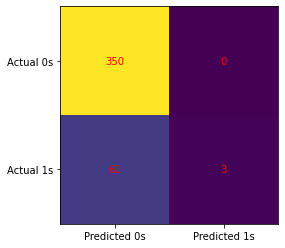

In [110]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [111]:
PastingLRInfo = ['Pasting LR', pasteLR.score(X_train, y_train), pasteLR.score(X_test, y_test), 
                  abs(pasteLR.score(X_train, y_train) - pasteLR.score(X_test, y_test)),
                  precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

## <font color=blue> AdaBoost </font>

The AdaBoost algorithm will be done using both Decision Tree and Logistic Regression.

In [112]:
from sklearn.ensemble import AdaBoostClassifier

### <font color=green> AdaBoost (Decision Tree) </font>

In [113]:
adaClfDT = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=4), 
                              n_estimators = 300, learning_rate = 1, random_state = 0)
adaClfDT.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   learning_rate=1, n_estimators=300, random_state=0)

**Train scores for models** 

In [114]:
print(adaClfDT.score(X_train, y_train))

1.0


**Test scores for models**

In [115]:
print(adaClfDT.score(X_test, y_test))

0.8502415458937198


**Predict the results (train data)**

In [116]:
y_pred = adaClfDT.predict(X_train)

**Classification Report (train data)** 

In [117]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       157

    accuracy                           1.00       965
   macro avg       1.00      1.00      1.00       965
weighted avg       1.00      1.00      1.00       965



In [118]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [119]:
y_pred = adaClfDT.predict(X_test)

**Classification Report (test data)** 

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       350
           1       0.56      0.14      0.23        64

    accuracy                           0.85       414
   macro avg       0.71      0.56      0.57       414
weighted avg       0.82      0.85      0.81       414



In [121]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [122]:
confm = confusion_matrix(y_test, y_pred)

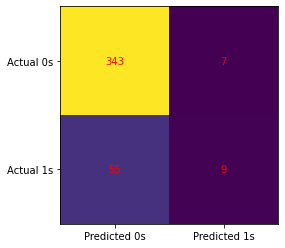

In [123]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

#### Visualize Feature Importance

In [124]:
features = sorted(X)
n_features = X.shape[1]

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\tree\_classes.py:590: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


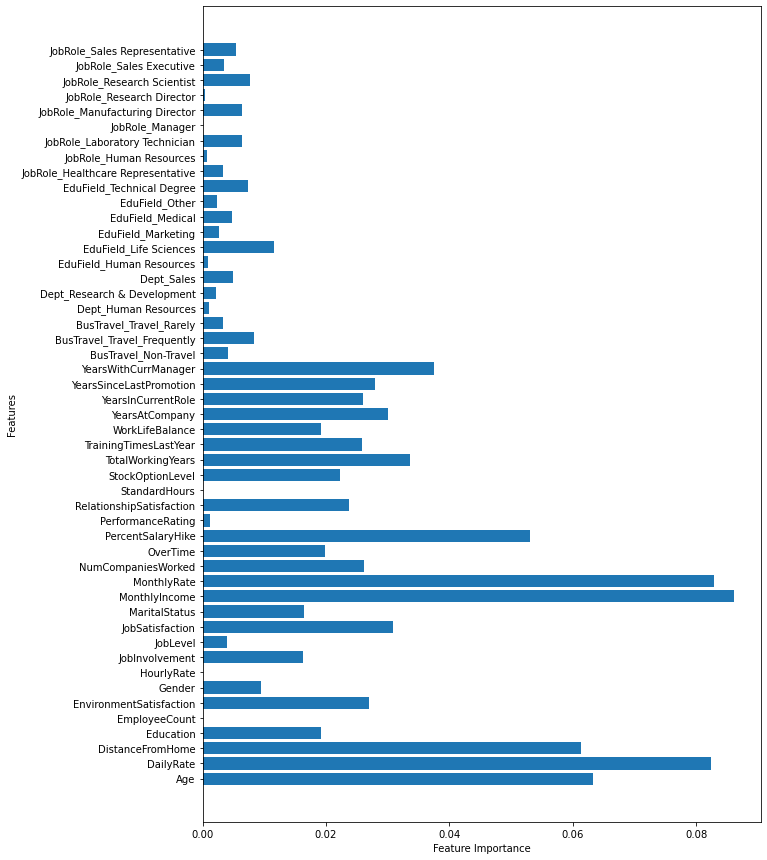

In [125]:
%matplotlib inline

plt.subplots(figsize = (10,15))
plt.barh(range(n_features), adaClfDT.feature_importances_, align='center')
plt.yticks(range(len(adaClfDT.feature_importances_)), X.columns)
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()

**Hold important data for evaluation**

In [126]:
adaDTInfo = ['AdaBoostDT', adaClfDT.score(X_train, y_train), adaClfDT.score(X_test, y_test), 
             abs(adaClfDT.score(X_train, y_train) - adaClfDT.score(X_test, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

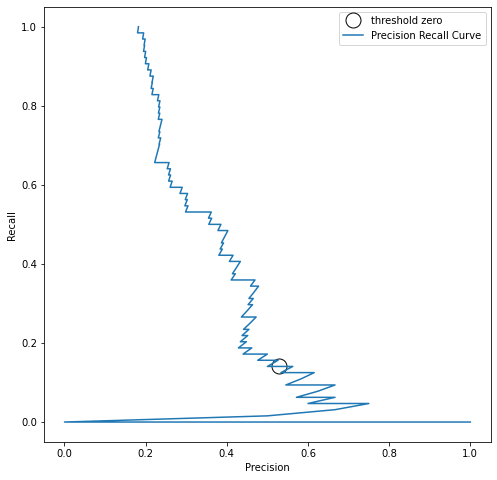

In [127]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, adaClfDT.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

### <font color=green> AdaBoost (Logistic Regression) </font>

In [128]:
adaClfLR = AdaBoostClassifier(LogisticRegression(C=1, max_iter=10000, solver='liblinear'), 
                              n_estimators = 300, learning_rate = .65, random_state = 0)
adaClfLR.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=1, max_iter=10000,
                                                     solver='liblinear'),
                   learning_rate=0.65, n_estimators=300, random_state=0)

**Train scores for models** 

In [129]:
print(adaClfLR.score(X_train, y_train))

0.8818652849740932


**Test scores for models**

In [130]:
print(adaClfLR.score(X_test, y_test))

0.8671497584541062


**Predict the results (train data)**

In [131]:
y_pred = adaClfLR.predict(X_train)

**Classification Report (train data)** 

In [132]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       808
           1       0.77      0.39      0.52       157

    accuracy                           0.88       965
   macro avg       0.83      0.69      0.73       965
weighted avg       0.87      0.88      0.87       965



In [133]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [134]:
y_pred = adaClfLR.predict(X_test)

**Classification Report (test data)** 

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       350
           1       0.67      0.28      0.40        64

    accuracy                           0.87       414
   macro avg       0.77      0.63      0.66       414
weighted avg       0.85      0.87      0.84       414



In [136]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [137]:
confm = confusion_matrix(y_test, y_pred)

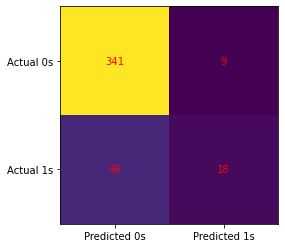

In [138]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [139]:
adaLRInfo = ['AdaBoostLR', adaClfLR.score(X_train, y_train), adaClfLR.score(X_test, y_test), 
             abs(adaClfLR.score(X_train, y_train) - adaClfLR.score(X_test, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

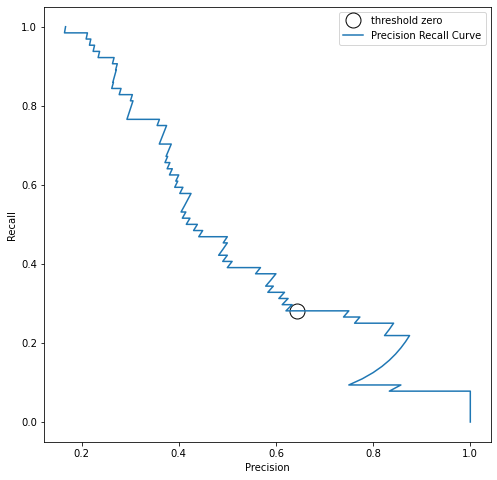

In [140]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, adaClfLR.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

## <font color=blue> Gradient Boosting </font>

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
params = {'loss': ['deviance', 'exponential'],
          'learning_rate': [0.1, 0.2, 0.5, 1],
          'n_estimators': [100, 200, 300],
          'max_depth': [1, 3, 5, 8]}

In [143]:
gbClf = GridSearchCV(GradientBoostingClassifier(random_state = 0), params)
gbClf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [1, 3, 5, 8],
                         'n_estimators': [100, 200, 300]})

In [144]:
print(gbClf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=300,
                           random_state=0)


In [145]:
gbClf = GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=300,
                           random_state=0)
gbClf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=300,
                           random_state=0)

**Train score** 

In [146]:
print(gbClf.score(X_train, y_train))

0.9233160621761658


**Test score**

In [147]:
print(gbClf.score(X_test, y_test))

0.8671497584541062


**Predict the results (train data)**

In [148]:
y_pred = gbClf.predict(X_train)

**Classification Report (train data)** 

In [149]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       808
           1       0.96      0.55      0.70       157

    accuracy                           0.92       965
   macro avg       0.94      0.77      0.83       965
weighted avg       0.93      0.92      0.91       965



In [150]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [151]:
y_pred = gbClf.predict(X_test)

**Classification Report (test data)** 

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       350
           1       0.67      0.28      0.40        64

    accuracy                           0.87       414
   macro avg       0.77      0.63      0.66       414
weighted avg       0.85      0.87      0.84       414



In [153]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [154]:
confm = confusion_matrix(y_test, y_pred)

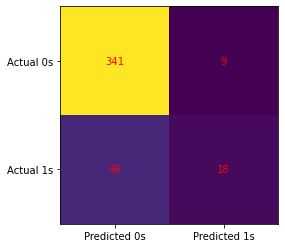

In [155]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

#### Visualize Feature Importance

In [156]:
features = sorted(X)
n_features = X.shape[1]

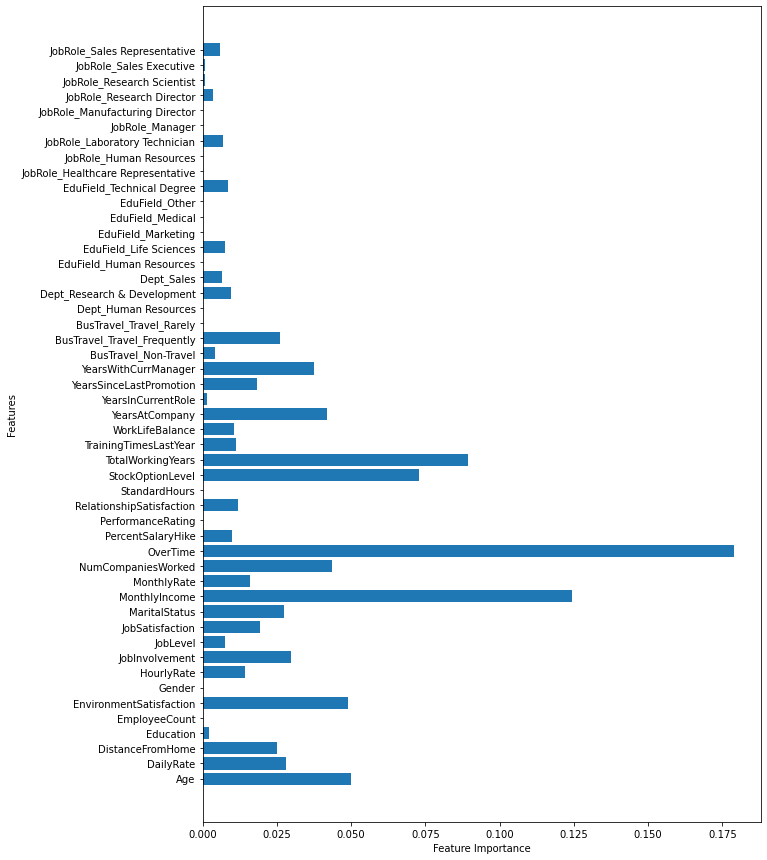

In [157]:
%matplotlib inline

plt.subplots(figsize = (10,15))
plt.barh(range(n_features), gbClf.feature_importances_, align='center')
plt.yticks(range(len(gbClf.feature_importances_)), X.columns)
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()

**Hold important data for evaluation**

In [158]:
gbInfo = ['GradientBoost', gbClf.score(X_train, y_train), gbClf.score(X_test, y_test), 
             abs(gbClf.score(X_train, y_train) - gbClf.score(X_test, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

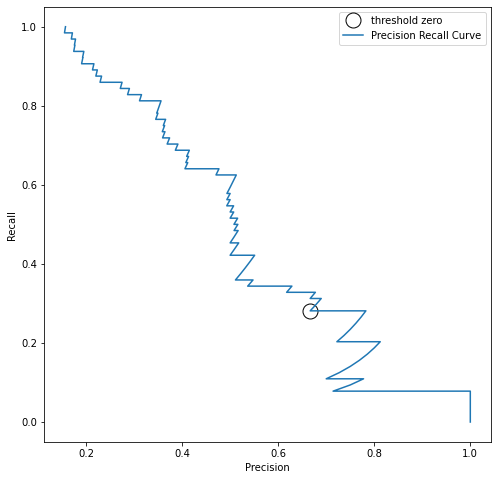

In [159]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, gbClf.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

## <font color=blue> PCA </font>

These PCA techniques are done using the models utilized in Project 1 (KNN, Logistic Regression, Linear SVC, Kernelized SVC (Linear, RBF, Poly), and Decision Tree). The PCA results will be compared to the results achieved in Project 1 in the 'Evaluation' section of this notebook.

In [160]:
from sklearn.decomposition import PCA

In [163]:
pca = PCA(n_components = 0.95)
Xtrn_reduced = pca.fit_transform(X_train)
Xtst_reduced = pca.transform(X_test)

In [164]:
pca.n_components_

30

### <font color=green> kNN Classification </font>

In [165]:
kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(Xtrn_reduced, y_train)

KNeighborsClassifier(n_neighbors=7)

**Train score** 

In [166]:
print(kNN.score(Xtrn_reduced, y_train))

0.8704663212435233


**Test score**

In [167]:
print(kNN.score(Xtst_reduced, y_test))

0.8526570048309179


**Predict the results (train data)**

In [168]:
y_pred = kNN.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [169]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       808
           1       0.90      0.23      0.37       157

    accuracy                           0.87       965
   macro avg       0.88      0.61      0.65       965
weighted avg       0.87      0.87      0.84       965



In [170]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [171]:
y_pred = kNN.predict(Xtst_reduced)

**Classification Report (test data)** 

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       350
           1       0.64      0.11      0.19        64

    accuracy                           0.85       414
   macro avg       0.75      0.55      0.55       414
weighted avg       0.82      0.85      0.81       414



In [173]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [174]:
confm = confusion_matrix(y_test, y_pred)

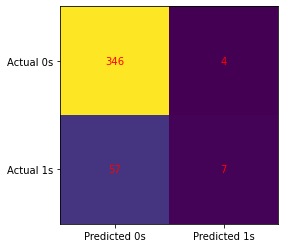

In [175]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [176]:
pcaKNNInfo = ['PCA kNN', kNN.score(Xtrn_reduced, y_train), kNN.score(Xtst_reduced, y_test), 
             abs(kNN.score(Xtrn_reduced, y_train) - kNN.score(Xtst_reduced, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Logistic Regression </font>

In [177]:
log = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
log.fit(Xtrn_reduced, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')

**Train score** 

In [178]:
print(log.score(Xtrn_reduced, y_train))

0.8818652849740932


**Test score**

In [179]:
print(log.score(Xtst_reduced, y_test))

0.8719806763285024


**Predict the results (train data)**

In [180]:
y_pred = log.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [181]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       808
           1       0.79      0.38      0.51       157

    accuracy                           0.88       965
   macro avg       0.84      0.68      0.72       965
weighted avg       0.87      0.88      0.86       965



In [182]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [183]:
y_pred = log.predict(Xtst_reduced)

**Classification Report (test data)** 

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.70      0.30      0.42        64

    accuracy                           0.87       414
   macro avg       0.79      0.64      0.67       414
weighted avg       0.86      0.87      0.85       414



In [185]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [186]:
confm = confusion_matrix(y_test, y_pred)

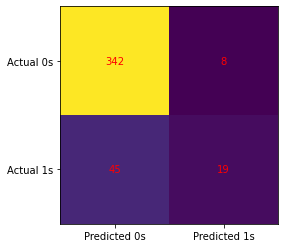

In [187]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [188]:
pcaLRInfo = ['PCA LR', log.score(Xtrn_reduced, y_train), log.score(Xtst_reduced, y_test), 
             abs(log.score(Xtrn_reduced, y_train) - log.score(Xtst_reduced, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Linear SVC </font>

In [189]:
lsvc = LinearSVC(C=0.1, dual=False, max_iter=15000, random_state=0)
lsvc.fit(Xtrn_reduced, y_train)

LinearSVC(C=0.1, dual=False, max_iter=15000, random_state=0)

**Train score** 

In [190]:
print(lsvc.score(Xtrn_reduced, y_train))

0.877720207253886


**Test score**

In [191]:
print(lsvc.score(Xtst_reduced, y_test))

0.8768115942028986


**Predict the results (train data)**

In [192]:
y_pred = lsvc.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [193]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       808
           1       0.85      0.30      0.44       157

    accuracy                           0.88       965
   macro avg       0.87      0.64      0.69       965
weighted avg       0.88      0.88      0.85       965



In [194]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [195]:
y_pred = lsvc.predict(Xtst_reduced)

**Classification Report (test data)** 

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       350
           1       0.81      0.27      0.40        64

    accuracy                           0.88       414
   macro avg       0.84      0.63      0.67       414
weighted avg       0.87      0.88      0.85       414



In [197]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [198]:
confm = confusion_matrix(y_test, y_pred)

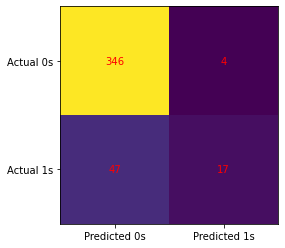

In [199]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [200]:
pcaLSVCInfo = ['PCA LinearSVC', lsvc.score(Xtrn_reduced, y_train), lsvc.score(Xtst_reduced, y_test), 
             abs(lsvc.score(Xtrn_reduced, y_train) - lsvc.score(Xtst_reduced, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Kernelized SVC (Linear) </font>

In [201]:
svcLin = SVC(C=1, kernel='linear', probability=True, random_state=0)
svcLin.fit(Xtrn_reduced, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=0)

**Train score** 

In [202]:
print(svcLin.score(Xtrn_reduced, y_train))

0.883937823834197


**Test score**

In [203]:
print(svcLin.score(Xtst_reduced, y_test))

0.8743961352657005


**Predict the results (train data)**

In [204]:
y_pred = svcLin.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [205]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       808
           1       0.85      0.35      0.50       157

    accuracy                           0.88       965
   macro avg       0.87      0.67      0.71       965
weighted avg       0.88      0.88      0.86       965



In [206]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [207]:
y_pred = svcLin.predict(Xtst_reduced)

**Classification Report (test data)** 

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.75      0.28      0.41        64

    accuracy                           0.87       414
   macro avg       0.82      0.63      0.67       414
weighted avg       0.86      0.87      0.85       414



In [209]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [210]:
confm = confusion_matrix(y_test, y_pred)

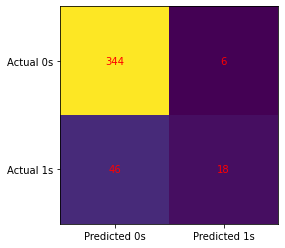

In [211]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [212]:
pcaKernLinInfo = ['PCA KernLinear', svcLin.score(Xtrn_reduced, y_train), svcLin.score(Xtst_reduced, y_test), 
                 abs(svcLin.score(Xtrn_reduced, y_train) - svcLin.score(Xtst_reduced, y_test)),
                 precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Kernelized SVC (RBF) </font>

In [213]:
svcRbf = SVC(C=100, gamma=0.01)
svcRbf.fit(Xtrn_reduced, y_train)

SVC(C=100, gamma=0.01)

**Train score** 

In [214]:
print(svcRbf.score(Xtrn_reduced, y_train))

0.9025906735751296


**Test score**

In [215]:
print(svcRbf.score(Xtst_reduced, y_test))

0.8768115942028986


**Predict the results (train data)**

In [216]:
y_pred = svcRbf.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [217]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       808
           1       0.90      0.45      0.60       157

    accuracy                           0.90       965
   macro avg       0.90      0.72      0.77       965
weighted avg       0.90      0.90      0.89       965



In [218]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [219]:
y_pred = svcRbf.predict(Xtst_reduced)

**Classification Report (test data)** 

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.76      0.30      0.43        64

    accuracy                           0.88       414
   macro avg       0.82      0.64      0.68       414
weighted avg       0.87      0.88      0.85       414



In [221]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [222]:
confm = confusion_matrix(y_test, y_pred)

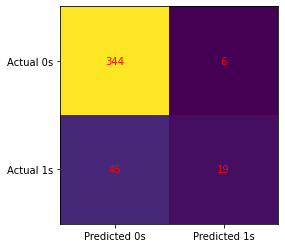

In [223]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [224]:
pcaKernRBFInfo = ['PCA KernRBF', svcRbf.score(Xtrn_reduced, y_train), svcRbf.score(Xtst_reduced, y_test), 
                 abs(svcRbf.score(Xtrn_reduced, y_train) - svcRbf.score(Xtst_reduced, y_test)),
                 precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Kernelized SVC (Poly) </font>

In [225]:
svcPoly = SVC(coef0=1, gamma=0.1, kernel='poly')
svcPoly.fit(Xtrn_reduced, y_train)

SVC(coef0=1, gamma=0.1, kernel='poly')

**Train score** 

In [226]:
print(svcPoly.score(Xtrn_reduced, y_train))

0.9088082901554404


**Test score**

In [227]:
print(svcPoly.score(Xtst_reduced, y_test))

0.8623188405797102


**Predict the results (train data)**

In [228]:
y_pred = svcPoly.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [229]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       808
           1       0.96      0.46      0.62       157

    accuracy                           0.91       965
   macro avg       0.93      0.73      0.78       965
weighted avg       0.91      0.91      0.89       965



In [230]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [231]:
y_pred = svcPoly.predict(Xtst_reduced)

**Classification Report (test data)** 

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       350
           1       0.65      0.23      0.34        64

    accuracy                           0.86       414
   macro avg       0.76      0.61      0.63       414
weighted avg       0.84      0.86      0.83       414



In [233]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [234]:
confm = confusion_matrix(y_test, y_pred)

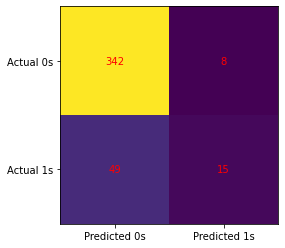

In [235]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [236]:
pcaKernPolyInfo = ['PCA KernPoly', svcPoly.score(Xtrn_reduced, y_train), svcPoly.score(Xtst_reduced, y_test), 
                   abs(svcPoly.score(Xtrn_reduced, y_train) - svcPoly.score(Xtst_reduced, y_test)),
                   precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

### <font color=green> Decision Tree </font>

In [237]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dt.fit(Xtrn_reduced, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

**Train score** 

In [238]:
print(dt.score(Xtrn_reduced, y_train))

0.8735751295336788


**Test score**

In [239]:
print(dt.score(Xtst_reduced, y_test))

0.8333333333333334


**Predict the results (train data)**

In [240]:
y_pred = dt.predict(Xtrn_reduced)

**Classification Report (train data)** 

In [241]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       808
           1       0.74      0.34      0.47       157

    accuracy                           0.87       965
   macro avg       0.81      0.66      0.70       965
weighted avg       0.86      0.87      0.85       965



In [242]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [243]:
y_pred = dt.predict(Xtst_reduced)

**Classification Report (test data)** 

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       350
           1       0.43      0.25      0.32        64

    accuracy                           0.83       414
   macro avg       0.65      0.59      0.61       414
weighted avg       0.80      0.83      0.81       414



In [245]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [246]:
confm = confusion_matrix(y_test, y_pred)

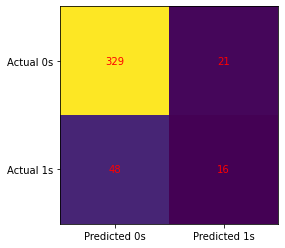

In [247]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [248]:
pcaDTInfo = ['PCA DecTree', dt.score(Xtrn_reduced, y_train), dt.score(Xtst_reduced, y_test), 
             abs(dt.score(Xtrn_reduced, y_train) - dt.score(Xtst_reduced, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

## <font color=blue> Deep Learning </font>

In [249]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [250]:
model = Sequential()
model.add(Dense(10, activation="relu", input_dim = 49))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [251]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [252]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 430us/step - loss: 0.4698 - accuracy: 0.8332
Epoch 2/150
97/97 [==============================] - 0s 440us/step - loss: 0.4033 - accuracy: 0.8373
Epoch 3/150
97/97 [==============================] - 0s 440us/step - loss: 0.3902 - accuracy: 0.8373
Epoch 4/150
97/97 [==============================] - 0s 491us/step - loss: 0.3780 - accuracy: 0.8394
Epoch 5/150
97/97 [==============================] - 0s 450us/step - loss: 0.3669 - accuracy: 0.8446
Epoch 6/150
97/97 [==============================] - 0s 445us/step - loss: 0.3567 - accuracy: 0.8477
Epoch 7/150
97/97 [==============================] - 0s 450us/step - loss: 0.3461 - accuracy: 0.8611
Epoch 8/150
97/97 [==============================] - 0s 440us/step - loss: 0.3355 - accuracy: 0.8736
Epoch 9/150
97/97 [==============================] - 0s 450us/step - loss: 0.3286 - accuracy: 0.8725
Epoch 10/150
97/97 [==============================] - 0s 440us/step - loss: 0.3202 - accura

**Train and Test Scores**

In [253]:
scoresTrn = model.evaluate(X_train, y_train)
print('Train Score:',scoresTrn[1])

scoresTst = model.evaluate(X_test, y_test)
print('Test Score:',scoresTst[1])

31/31 [==============================] - 0s 352us/step - loss: 0.1414 - accuracy: 0.9565
Train Score: 0.9564766883850098
13/13 [==============================] - 0s 420us/step - loss: 0.4922 - accuracy: 0.8285
Test Score: 0.8285024166107178


## <font color=blue> Evaluation </font>

### <font color=green> Project 1 Model Results </font>

**Import csv containing Project 1 DataFrame results**

In [254]:
P1Results = pd.read_csv('P1Results.csv')

**Drop meaningless column**

In [255]:
P1Results = P1Results.drop(['Unnamed: 0'], axis = 1)

#### Round the data

In [256]:
P1Results = P1Results.round(4)

**Display DataFrame**

In [257]:
P1Results

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,kNN,0.8694,0.8454,0.0240,0.8735,0.6116,0.6454,0.6779,0.5383,0.5364
1,LogisticRegression,0.8891,0.8768,0.0123,0.8578,0.6952,0.7408,0.8222,0.6399,0.6790
2,LinearSVC,0.8829,0.8696,0.0133,0.8698,0.6632,0.7090,0.8128,0.6100,0.6423
3,KernLinearSVC,0.8933,0.8696,0.0237,0.8642,0.7079,0.7541,0.7718,0.6483,0.6819
4,KernRbfSVC,0.9109,0.8671,0.0437,0.9016,0.7518,0.8010,0.7618,0.6469,0.6789
5,KernPolySVC,0.9285,0.8575,0.0710,0.9226,0.8033,0.8481,0.7277,0.6348,0.6616
6,DecisionTree,0.8829,0.8406,0.0423,0.8698,0.6632,0.7090,0.6739,0.6057,0.6247


### <font color=green> PCA Model Results </font>

**Aggregate the data for each PCA model**

In [258]:
pcaModels = np.array([pcaKNNInfo,
                    pcaLRInfo,
                    pcaLSVCInfo,
                    pcaKernLinInfo,
                    pcaKernRBFInfo,
                    pcaKernPolyInfo,
                    pcaDTInfo
                    ])
pcaValues = pd.DataFrame(pcaModels, columns = ['ModelType', 'TrainScore', 'TestScore', 
                                               'Difference', 'PrecisionTrn', 'RecallTrn', 'f1-scoreTrn', 
                                               'PrecisionTest', 'RecallTest', 'f1-scoreTest'])

**Set the dtypes to float**

In [259]:
pcaValues[['TrainScore', 'TestScore', 
           'Difference', 'PrecisionTrn', 
           'RecallTrn', 'f1-scoreTrn', 
           'PrecisionTest','RecallTest', 
           'f1-scoreTest']] = pcaValues[['TrainScore', 'TestScore', 
                                        'Difference', 'PrecisionTrn', 
                                        'RecallTrn', 'f1-scoreTrn', 
                                        'PrecisionTest', 'RecallTest', 
                                        'f1-scoreTest']].astype('float')

**Round the data**

In [260]:
pcaValues = pcaValues.round(4)

**Display DataFrame**

In [261]:
pcaValues

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,PCA kNN,0.8705,0.8527,0.0178,0.8846,0.6122,0.6467,0.7475,0.5490,0.5528
1,PCA LR,0.8819,0.8720,0.0099,0.8383,0.6780,0.7207,0.7937,0.6370,0.6728
2,PCA LinearSVC,0.8777,0.8768,0.0009,0.8668,0.6447,0.6874,0.8450,0.6271,0.6657
3,PCA KernLinear,0.8839,0.8744,0.0095,0.8664,0.6690,0.7150,0.8160,0.6321,0.6694
4,PCA KernRBF,0.9026,0.8768,0.0258,0.9008,0.7212,0.7731,0.8222,0.6399,0.6790
5,PCA KernPoly,0.9088,0.8623,0.0465,0.9322,0.7274,0.7844,0.7634,0.6058,0.6340
6,PCA DecTree,0.8736,0.8333,0.0402,0.8121,0.6602,0.6989,0.6526,0.5950,0.6110


### <font color=green> Results from Voting, AdaBoost, GradientBoost & Bagging/Pasting Models </font>

**Aggregate the data for each model**

In [262]:
Xvalues = np.array([VotingHInfo,
                    VotingSInfo,
                    adaDTInfo,
                    adaLRInfo,
                    gbInfo,
                    BaggingDTInfo,
                    BaggingLRInfo,
                    PastingDTInfo,
                    PastingLRInfo])

dfValues = pd.DataFrame(Xvalues, columns = ['ModelType', 'TrainScore', 'TestScore', 
                                            'Difference', 'PrecisionTrn', 'RecallTrn', 'f1-scoreTrn', 
                                            'PrecisionTest', 'RecallTest', 'f1-scoreTest'])

**Set the dtypes to float**

In [263]:
dfValues[['TrainScore', 'TestScore', 
          'Difference', 'PrecisionTrn', 
          'RecallTrn', 'f1-scoreTrn', 
          'PrecisionTest','RecallTest', 
          'f1-scoreTest']] = dfValues[['TrainScore', 'TestScore', 
                                       'Difference', 'PrecisionTrn', 
                                       'RecallTrn', 'f1-scoreTrn', 
                                       'PrecisionTest', 'RecallTest', 
                                       'f1-scoreTest']].astype('float')

**Round the data**

In [264]:
dfValues = dfValues.round(4)

**Display DataFrame**

In [265]:
dfValues

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,VotingHard,0.8912,0.8744,0.0168,0.8729,0.6938,0.7418,0.8160,0.6321,0.6694
1,VotingSoft,0.8881,0.8575,0.0306,0.9076,0.6663,0.7162,0.7776,0.5646,0.5776
2,AdaBoostDT,1.0000,0.8502,0.1498,1.0000,1.0000,1.0000,0.7122,0.5603,0.5711
3,AdaBoostLR,0.8819,0.8671,0.0147,0.8290,0.6857,0.7268,0.7739,0.6278,0.6605
4,GradientBoost,0.9233,0.8671,0.0562,0.9380,0.7746,0.8288,0.7739,0.6278,0.6605
5,Bagging DT,0.8611,0.8502,0.0109,0.8926,0.5784,0.5975,0.7398,0.5348,0.5284
6,Bagging LR,0.8435,0.8527,0.0091,0.8591,0.5217,0.4996,0.9258,0.5234,0.5047
7,Pasting DT,0.8611,0.8478,0.0133,0.9093,0.5758,0.5935,0.7120,0.5270,0.5147
8,Pasting LR,0.8435,0.8527,0.0091,0.8591,0.5217,0.4996,0.9258,0.5234,0.5047


### <font color=green> Comparison Between Model Results </font>

**Project 1 Model Results**

In [266]:
P1Results

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,kNN,0.8694,0.8454,0.0240,0.8735,0.6116,0.6454,0.6779,0.5383,0.5364
1,LogisticRegression,0.8891,0.8768,0.0123,0.8578,0.6952,0.7408,0.8222,0.6399,0.6790
2,LinearSVC,0.8829,0.8696,0.0133,0.8698,0.6632,0.7090,0.8128,0.6100,0.6423
3,KernLinearSVC,0.8933,0.8696,0.0237,0.8642,0.7079,0.7541,0.7718,0.6483,0.6819
4,KernRbfSVC,0.9109,0.8671,0.0437,0.9016,0.7518,0.8010,0.7618,0.6469,0.6789
5,KernPolySVC,0.9285,0.8575,0.0710,0.9226,0.8033,0.8481,0.7277,0.6348,0.6616
6,DecisionTree,0.8829,0.8406,0.0423,0.8698,0.6632,0.7090,0.6739,0.6057,0.6247


**PCA Model Results**

In [267]:
pcaValues

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,PCA kNN,0.8705,0.8527,0.0178,0.8846,0.6122,0.6467,0.7475,0.5490,0.5528
1,PCA LR,0.8819,0.8720,0.0099,0.8383,0.6780,0.7207,0.7937,0.6370,0.6728
2,PCA LinearSVC,0.8777,0.8768,0.0009,0.8668,0.6447,0.6874,0.8450,0.6271,0.6657
3,PCA KernLinear,0.8839,0.8744,0.0095,0.8664,0.6690,0.7150,0.8160,0.6321,0.6694
4,PCA KernRBF,0.9026,0.8768,0.0258,0.9008,0.7212,0.7731,0.8222,0.6399,0.6790
5,PCA KernPoly,0.9088,0.8623,0.0465,0.9322,0.7274,0.7844,0.7634,0.6058,0.6340
6,PCA DecTree,0.8736,0.8333,0.0402,0.8121,0.6602,0.6989,0.6526,0.5950,0.6110


**Other Model Results**

In [268]:
dfValues

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,VotingHard,0.8912,0.8744,0.0168,0.8729,0.6938,0.7418,0.8160,0.6321,0.6694
1,VotingSoft,0.8881,0.8575,0.0306,0.9076,0.6663,0.7162,0.7776,0.5646,0.5776
2,AdaBoostDT,1.0000,0.8502,0.1498,1.0000,1.0000,1.0000,0.7122,0.5603,0.5711
3,AdaBoostLR,0.8819,0.8671,0.0147,0.8290,0.6857,0.7268,0.7739,0.6278,0.6605
4,GradientBoost,0.9233,0.8671,0.0562,0.9380,0.7746,0.8288,0.7739,0.6278,0.6605
5,Bagging DT,0.8611,0.8502,0.0109,0.8926,0.5784,0.5975,0.7398,0.5348,0.5284
6,Bagging LR,0.8435,0.8527,0.0091,0.8591,0.5217,0.4996,0.9258,0.5234,0.5047
7,Pasting DT,0.8611,0.8478,0.0133,0.9093,0.5758,0.5935,0.7120,0.5270,0.5147
8,Pasting LR,0.8435,0.8527,0.0091,0.8591,0.5217,0.4996,0.9258,0.5234,0.5047


**PCA Results vs. Project 1 Results**

In Project 1 we chose Logistic Regression as the 'best option' for prediction on this dataset. Comparing thae Logistic Regression results to the overall PCA results, it seems that PCA does not help in achieving better results. The closest results were in the Kernelized RBF PCA results, which scored similarly (looking at the f1 score) to the Logistic Regression f1 score for the test set, but it fell behind on the f1-score for the train set as well as having a larger difference between the train and test accuracy scores (and thus are larger risk of overfitting).

**Other Model Results Analysis**

Similar to the PCA results, majority of the other models (Voting, AdaBoost, GradientBoost, Bagging & Pasting) did not perform well compared to the original results received in project 1. The closest model to achieving similar results was the Hard Voting Classifier, which had a slighlty higher accuracy scores and a higher f1-score for the training set, while having a slighly lower f1-score for the testing set. 